In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from feature_selectors import selection
from sklearn.preprocessing import StandardScaler

In [32]:
gebruikers_df = pd.read_csv(r'..\..\data\gebruikersinformatie.csv', delimiter = ';')
evenement_df = pd.read_csv(r'..\..\data\evenementinformatie.csv', delimiter = ';')
aanwezigheid_df = pd.read_csv(r'..\..\data\evenementaanwezigheid.csv', delimiter = ';')
bericht_df = pd.read_csv(r'..\..\data\berichtinteracties_met_sentiment.csv', delimiter = ';')

In [33]:
# Merge aanwezigheid_df with evenement_df
aanwezigheid_df = aanwezigheid_df.merge(evenement_df, on = "EvenementID", how = "left")

# Merge the result with gebruikers_df
aanwezigheid_df = aanwezigheid_df.merge(gebruikers_df, on = "GebruikerID", how = "left")

# Rename columns for consistency
aanwezigheid_df.rename(
    columns = {col: f"Evenement_{col}" for col in evenement_df.columns if col != "EvenementID"},
    inplace = True
)

aanwezigheid_df.rename(
    columns = {col: f"Gebruiker_{col}" for col in gebruikers_df.columns if col != "GebruikerID"},
    inplace = True
)

aanwezigheid_df

,EvenementID,GebruikerID,Aanwezigheidsstatus,Evenement_EvenementType,Evenement_EvenementDatum,Evenement_OrganisatorID,Gebruiker_RegistratieDatum,Gebruiker_LaatsteLogin,Gebruiker_Leeftijd,Gebruiker_Studierichting,Gebruiker_Studiejaar,Gebruiker_Lidmaatschapstype
0,E001,G123,Bijgewoond,BBQ,24-2-2023,G296,15-5-2023,11-12-2023,19.0,Data engineering,Eerstejaars,Regulier
1,E001,G296,Bijgewoond,BBQ,24-2-2023,G296,6-9-2023,18-3-2024,22.0,Security & Cloud,Eerstejaars,Premium
2,E001,G032,Geregistreerd,BBQ,24-2-2023,G296,4-1-2023,19-5-2023,17.0,Data Engineering,Tweedejaars,Regulier
3,E001,G217,Bijgewoond,BBQ,24-2-2023,G296,13-8-2023,18-1-2024,24.0,Data Engineering,Vierdejaars,Regulier
4,E001,G162,Geregistreerd,BBQ,24-2-2023,G296,21-8-2023,8-5-2024,18.0,Human computer interaction,Tweedejaars,Regulier
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,E040,G238,Geregistreerd,Workshop,19-2-2023,G215,17-1-2023,9-5-2023,17.0,Data engineering,Vierdejaars,Regulier
3996,E040,G121,Geregistreerd,Workshop,19-2-2023,G215,15-10-2023,14-1-2024,24.0,Human computer interaction,Tweedejaars,Premium
3997,E040,G043,Bijgewoond,Workshop,19-2-2023,G215,14-7-2023,20-8-2023,21.0,Data engineering,Derdejaars,Premium
3998,E040,G164,Bijgewoond,Workshop,19-2-2023,G215,15-5-2023,28-11-2023,20.0,Data engineering,Derdejaars,Premium


In [34]:
# Remove nonvalid entries
aanwezigheid_df = aanwezigheid_df[~(aanwezigheid_df['Gebruiker_Leeftijd'].isna())]
aanwezigheid_df = aanwezigheid_df[~(aanwezigheid_df['Gebruiker_Lidmaatschapstype'] == 'x')]
aanwezigheid_df

,EvenementID,GebruikerID,Aanwezigheidsstatus,Evenement_EvenementType,Evenement_EvenementDatum,Evenement_OrganisatorID,Gebruiker_RegistratieDatum,Gebruiker_LaatsteLogin,Gebruiker_Leeftijd,Gebruiker_Studierichting,Gebruiker_Studiejaar,Gebruiker_Lidmaatschapstype
0,E001,G123,Bijgewoond,BBQ,24-2-2023,G296,15-5-2023,11-12-2023,19.0,Data engineering,Eerstejaars,Regulier
1,E001,G296,Bijgewoond,BBQ,24-2-2023,G296,6-9-2023,18-3-2024,22.0,Security & Cloud,Eerstejaars,Premium
2,E001,G032,Geregistreerd,BBQ,24-2-2023,G296,4-1-2023,19-5-2023,17.0,Data Engineering,Tweedejaars,Regulier
3,E001,G217,Bijgewoond,BBQ,24-2-2023,G296,13-8-2023,18-1-2024,24.0,Data Engineering,Vierdejaars,Regulier
4,E001,G162,Geregistreerd,BBQ,24-2-2023,G296,21-8-2023,8-5-2024,18.0,Human computer interaction,Tweedejaars,Regulier
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,E040,G238,Geregistreerd,Workshop,19-2-2023,G215,17-1-2023,9-5-2023,17.0,Data engineering,Vierdejaars,Regulier
3996,E040,G121,Geregistreerd,Workshop,19-2-2023,G215,15-10-2023,14-1-2024,24.0,Human computer interaction,Tweedejaars,Premium
3997,E040,G043,Bijgewoond,Workshop,19-2-2023,G215,14-7-2023,20-8-2023,21.0,Data engineering,Derdejaars,Premium
3998,E040,G164,Bijgewoond,Workshop,19-2-2023,G215,15-5-2023,28-11-2023,20.0,Data engineering,Derdejaars,Premium


In [35]:
# Convert ID to ints
to_convert = ["EvenementID", "GebruikerID", "Evenement_OrganisatorID"]

for col in to_convert:
    aanwezigheid_df[col] = aanwezigheid_df[col].str[1:].astype(int)
    
aanwezigheid_df

,EvenementID,GebruikerID,Aanwezigheidsstatus,Evenement_EvenementType,Evenement_EvenementDatum,Evenement_OrganisatorID,Gebruiker_RegistratieDatum,Gebruiker_LaatsteLogin,Gebruiker_Leeftijd,Gebruiker_Studierichting,Gebruiker_Studiejaar,Gebruiker_Lidmaatschapstype
0,1,123,Bijgewoond,BBQ,24-2-2023,296,15-5-2023,11-12-2023,19.0,Data engineering,Eerstejaars,Regulier
1,1,296,Bijgewoond,BBQ,24-2-2023,296,6-9-2023,18-3-2024,22.0,Security & Cloud,Eerstejaars,Premium
2,1,32,Geregistreerd,BBQ,24-2-2023,296,4-1-2023,19-5-2023,17.0,Data Engineering,Tweedejaars,Regulier
3,1,217,Bijgewoond,BBQ,24-2-2023,296,13-8-2023,18-1-2024,24.0,Data Engineering,Vierdejaars,Regulier
4,1,162,Geregistreerd,BBQ,24-2-2023,296,21-8-2023,8-5-2024,18.0,Human computer interaction,Tweedejaars,Regulier
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,40,238,Geregistreerd,Workshop,19-2-2023,215,17-1-2023,9-5-2023,17.0,Data engineering,Vierdejaars,Regulier
3996,40,121,Geregistreerd,Workshop,19-2-2023,215,15-10-2023,14-1-2024,24.0,Human computer interaction,Tweedejaars,Premium
3997,40,43,Bijgewoond,Workshop,19-2-2023,215,14-7-2023,20-8-2023,21.0,Data engineering,Derdejaars,Premium
3998,40,164,Bijgewoond,Workshop,19-2-2023,215,15-5-2023,28-11-2023,20.0,Data engineering,Derdejaars,Premium


In [36]:
# Factorize
to_factorize = ["Aanwezigheidsstatus", "Evenement_EvenementType", "Gebruiker_Studierichting",
                "Gebruiker_Lidmaatschapstype"]

for col in to_factorize:
    aanwezigheid_df[col], unique_values = pd.factorize(aanwezigheid_df[col])

    print(f"\n{col} numerics:")
    for i, value in enumerate(unique_values):
        print(f"{i} -> {value}")

aanwezigheid_df["Gebruiker_Studiejaar"] = aanwezigheid_df["Gebruiker_Studiejaar"].map({
    "Eerstejaars": 1,
    "Tweedejaars": 2,
    "Derdejaars": 3,
    "Vierdejaars": 4
})

aanwezigheid_df


Aanwezigheidsstatus numerics:
0 -> Bijgewoond
1 -> Geregistreerd
2 -> Afwezig

Evenement_EvenementType numerics:
0 -> BBQ
1 -> Lezing
2 -> Hackathon
3 -> Workshop

Gebruiker_Studierichting numerics:
0 -> Data engineering
1 -> Security & Cloud
2 -> Data Engineering
3 -> Human computer interaction
4 -> Software engineering

Gebruiker_Lidmaatschapstype numerics:
0 -> Regulier
1 -> Premium


,EvenementID,GebruikerID,Aanwezigheidsstatus,Evenement_EvenementType,Evenement_EvenementDatum,Evenement_OrganisatorID,Gebruiker_RegistratieDatum,Gebruiker_LaatsteLogin,Gebruiker_Leeftijd,Gebruiker_Studierichting,Gebruiker_Studiejaar,Gebruiker_Lidmaatschapstype
0,1,123,0,0,24-2-2023,296,15-5-2023,11-12-2023,19.0,0,1,0
1,1,296,0,0,24-2-2023,296,6-9-2023,18-3-2024,22.0,1,1,1
2,1,32,1,0,24-2-2023,296,4-1-2023,19-5-2023,17.0,2,2,0
3,1,217,0,0,24-2-2023,296,13-8-2023,18-1-2024,24.0,2,4,0
4,1,162,1,0,24-2-2023,296,21-8-2023,8-5-2024,18.0,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,40,238,1,3,19-2-2023,215,17-1-2023,9-5-2023,17.0,0,4,0
3996,40,121,1,3,19-2-2023,215,15-10-2023,14-1-2024,24.0,3,2,1
3997,40,43,0,3,19-2-2023,215,14-7-2023,20-8-2023,21.0,0,3,1
3998,40,164,0,3,19-2-2023,215,15-5-2023,28-11-2023,20.0,0,3,1


In [37]:
# Convert columns to datetime datatype and extract day/month/year
date_columns = ['Evenement_EvenementDatum', 'Gebruiker_RegistratieDatum', 'Gebruiker_LaatsteLogin']

for col in date_columns:
    aanwezigheid_df[col] = pd.to_datetime(aanwezigheid_df[col], dayfirst=True)
    
for col in date_columns:
    aanwezigheid_df[f'{col}_day'] = aanwezigheid_df[col].dt.day
    aanwezigheid_df[f'{col}_month'] = aanwezigheid_df[col].dt.month
    aanwezigheid_df[f'{col}_year'] = aanwezigheid_df[col].dt.year
    
aanwezigheid_df.drop(columns = date_columns, inplace = True)

aanwezigheid_df

,EvenementID,GebruikerID,Aanwezigheidsstatus,Evenement_EvenementType,Evenement_OrganisatorID,Gebruiker_Leeftijd,Gebruiker_Studierichting,Gebruiker_Studiejaar,Gebruiker_Lidmaatschapstype,Evenement_EvenementDatum_day,Evenement_EvenementDatum_month,Gebruiker_RegistratieDatum_day,Gebruiker_RegistratieDatum_month,Gebruiker_LaatsteLogin_day,Gebruiker_LaatsteLogin_month
0,1,123,0,0,296,19.0,0,1,0,24,2,15,5,11,12
1,1,296,0,0,296,22.0,1,1,1,24,2,6,9,18,3
2,1,32,1,0,296,17.0,2,2,0,24,2,4,1,19,5
3,1,217,0,0,296,24.0,2,4,0,24,2,13,8,18,1
4,1,162,1,0,296,18.0,3,2,0,24,2,21,8,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,40,238,1,3,215,17.0,0,4,0,19,2,17,1,9,5
3996,40,121,1,3,215,24.0,3,2,1,19,2,15,10,14,1
3997,40,43,0,3,215,21.0,0,3,1,19,2,14,7,20,8
3998,40,164,0,3,215,20.0,0,3,1,19,2,15,5,28,11


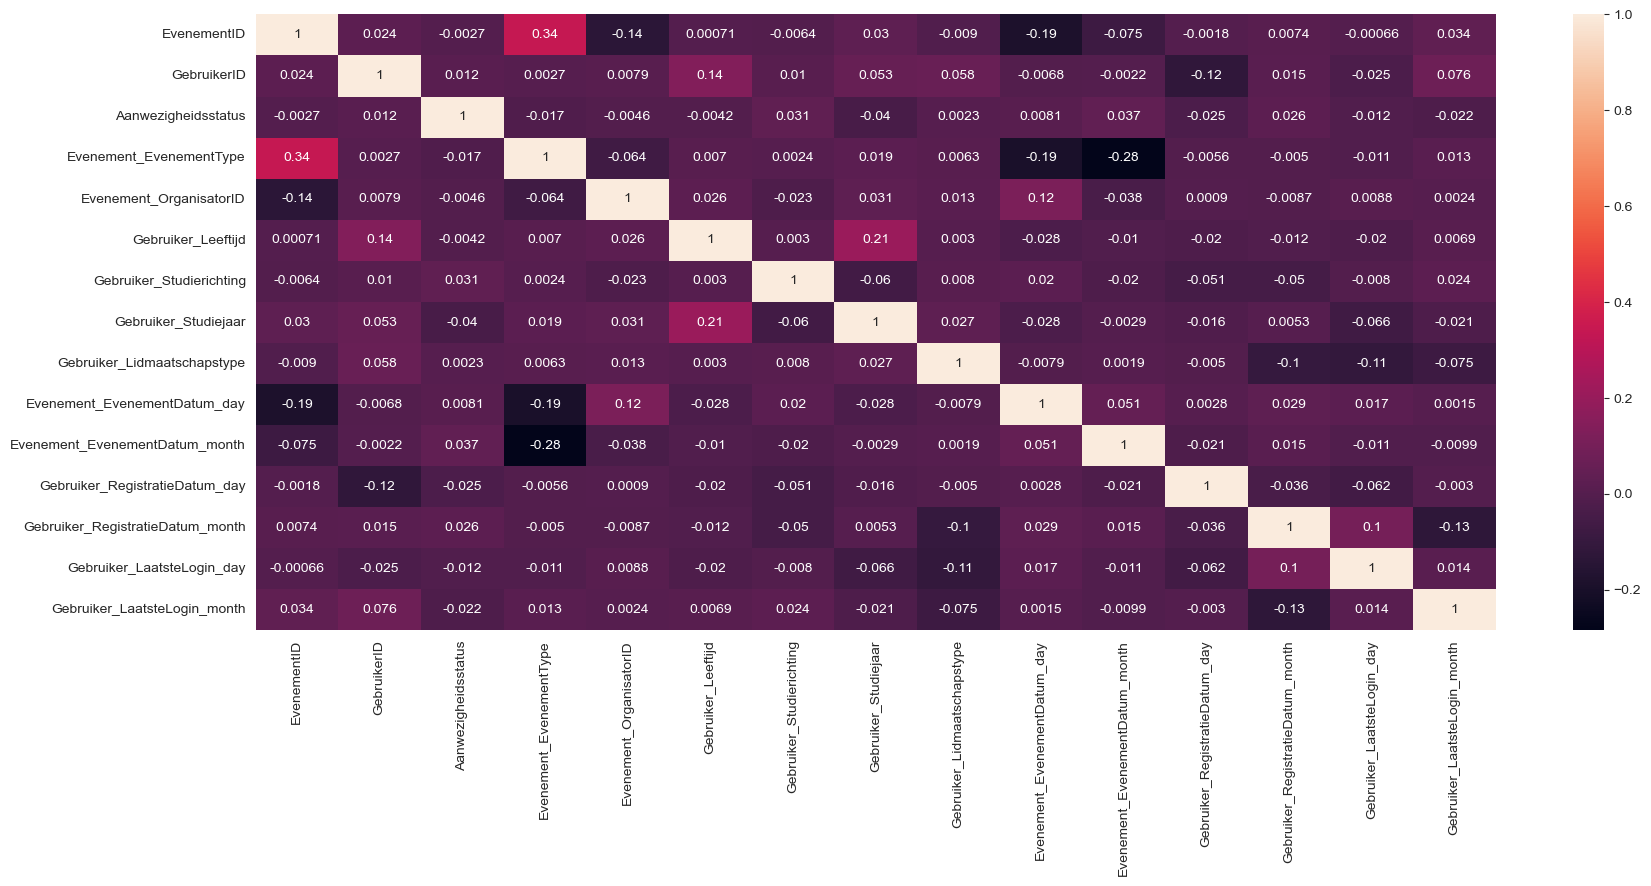

In [38]:
plt.figure(figsize = (20, 8))
sns.heatmap(aanwezigheid_df.corr(), annot = True)
plt.show()

In [40]:
# Test all outcomes to see which has the highest score
model = LinearRegression()
results = {}

for outcome in aanwezigheid_df.columns.tolist():
    test_predictors = aanwezigheid_df.columns.tolist()
    test_predictors.remove(outcome)

    predictors, score = selection(model, aanwezigheid_df, aanwezigheid_df[outcome], test_predictors, mode = "forward",
                                  metric = "adj_r2")

    # results[outcome] = (score, predictors)
    results[outcome] = score

print('\n\nOutcome\t\t\tScore')
for key, value in results.items():
    # print(f'{key} -> {value[0]}')
    print(f'{key} -> {value}')


Currently best predictors: []
Corresponding score: 0
Checking predictor: GebruikerID
Score: 0.0003150275718737383
Checking predictor: Aanwezigheidsstatus
Score: -0.00024897596678896683
Checking predictor: Evenement_EvenementType
Score: 0.11675603802701395
Checking predictor: Evenement_OrganisatorID
Score: 0.019075599573723845
Checking predictor: Gebruiker_Leeftijd
Score: -0.0002559061438622834
Checking predictor: Gebruiker_Studierichting
Score: -0.00021554849047489277
Checking predictor: Gebruiker_Studiejaar
Score: 0.000661051718958916
Checking predictor: Gebruiker_Lidmaatschapstype
Score: -0.00017601828308122514
Checking predictor: Evenement_EvenementDatum_day
Score: 0.0350856931702106
Checking predictor: Evenement_EvenementDatum_month
Score: 0.005335697775707304
Checking predictor: Gebruiker_RegistratieDatum_day
Score: -0.0002530180998072673
Checking predictor: Gebruiker_RegistratieDatum_month
Score: -0.00020180013641457606
Checking predictor: Gebruiker_LaatsteLogin_day
Score: -0.00